In [24]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
from joblib import dump
import cv2
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [25]:
data_path = './data_hand_writing/'
data_training = np.load(data_path + 'data_train.npz')

images = data_training['images']
labels = data_training['labels']

images_train, images_val, labels_train, labels_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [26]:
print(len(images_train[0]))

784


In [42]:
data_path = './data_hand_writing/pca/'
# Khởi tạo PCA và K-nn
pca = PCA(n_components=100, random_state=0)
images_train_pca = pca.fit_transform(images_train)
images_val_pca = pca.transform(images_val)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(images_train_pca, labels_train)

# Dự đoán trên tập validation
predictions = knn.predict(images_val_pca)
accuracy = accuracy_score(labels_val, predictions)
print(f'Accuracy on validation set: {accuracy}')

# Thực hiện đánh giá chéo
cross_val_scores = cross_val_score(knn, images_train_pca, labels_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {cross_val_scores.mean()}')

# Lưu mô hình và đối tượng PCA
# dump(knn, data_path + '2nn_model.joblib')
# dump(pca, data_path + 'pca.joblib')


c:\Users\iFx\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\iFx\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

Accuracy on validation set: 0.6691568836712913


c:\Users\iFx\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\iFx\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

Cross-validation scores: [0.63284379 0.62082777 0.63284379 0.60881175 0.6435247 ]
Mean cross-validation score: 0.6277703604806408


In [28]:
# def checkPCA():
#     result = []
#     for i in range(10, 1, -1):
#         n_com = (int)(784*i/100)
#         print(i, n_com)
#         pca = PCA(n_components=n_com, random_state=0)
#         images_train_pca = pca.fit_transform(images_train)
#         images_val_pca = pca.transform(images_val)

#         knn = KNeighborsClassifier(n_neighbors=2)
#         knn.fit(images_train_pca, labels_train)

#         # Dự đoán trên tập validation
#         predictions = knn.predict(images_val_pca)
#         accuracy = accuracy_score(labels_val, predictions)
#         # print(f'Accuracy on validation set: {accuracy}')

#         # Thực hiện đánh giá chéo
#         cross_val_scores = cross_val_score(knn, images_train_pca, labels_train, cv=5)
#         # print(f'Cross-validation scores: {cross_val_scores}')
#         # print(f'Mean cross-validation score: {cross_val_scores.mean()}')
#         result.append([n_com, accuracy, cross_val_scores.mean()])

#     return result

In [29]:
# result = checkPCA()
# print(result)

17 17 17


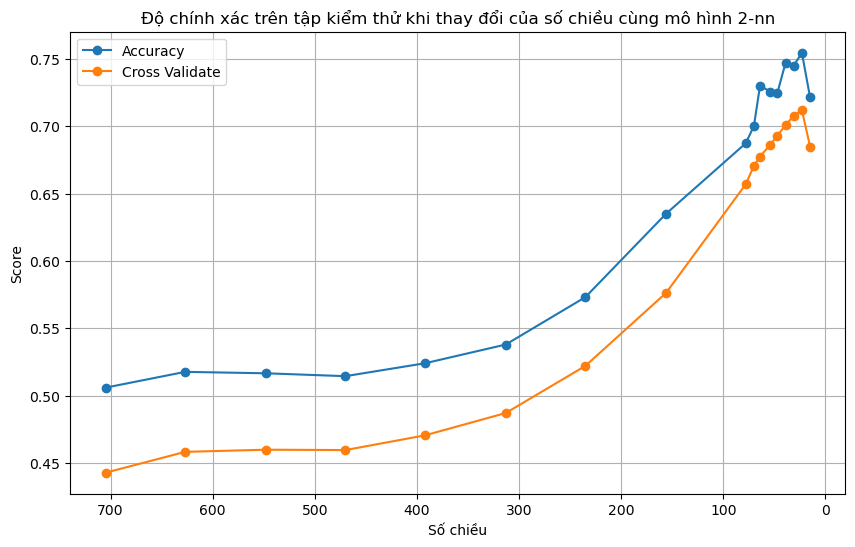

In [30]:
# import matplotlib.pyplot as plt

# # Dữ liệu đầu vào
# data_pca = [[705, 0.5058697972251868, 0.4427236315086782], 
#         [627, 0.5176093916755603, 0.4582109479305741], 
#         [548, 0.5165421558164355, 0.45981308411214955], 
#         [470, 0.5144076840981857, 0.4595460614152203],
#         [392, 0.5240128068303095, 0.47049399198931907], 
#         [313, 0.5378868729989328, 0.48704939919893186],
#         [235, 0.5731056563500534, 0.5220293724966623],
#         [156, 0.6350053361792957, 0.5762349799732978],
#         [78, 0.687299893276414, 0.656875834445928], 
#         [70, 0.7001067235859125, 0.670493991989319], 
#         [64, 0.7299893276414088, 0.6774365821094792], 
#         [54, 0.7257203842049093, 0.6862483311081442], 
#         [47, 0.7246531483457844, 0.6929238985313753], 
#         [39, 0.7470651013874067, 0.7009345794392523], 
#         [31, 0.7449306296691569, 0.7076101468624835], 
#         [23, 0.7545357524012807, 0.7118825100133511], 
#         [15, 0.7214514407684098, 0.684913217623498]]

# # Tách dữ liệu
# pca_labels = []
# pca_accuracies = []
# pca_cross_validates = []

# for x in pca_data:
#     pca_labels.append(x[0])
#     pca_accuracies.append(x[1])
#     pca_cross_validates.append(x[2])

# print(len(pca_labels), len(pca_accuracies), len(pca_cross_validates))
# # Vẽ biểu đồ
# plt.figure(figsize=(10, 6))
# plt.plot(pca_labels, pca_accuracies, label='Accuracy', marker='o')
# plt.plot(pca_labels, pca_cross_validates, label='Cross Validate', marker='o')
# plt.xlabel('Số chiều')
# plt.ylabel('Score')
# plt.title('Độ chính xác trên tập kiểm thử khi thay đổi của số chiều cùng mô hình 2-nn')
# plt.legend()
# plt.gca().invert_xaxis()  # Đảo chiều trục x để thể hiện giảm dần số chiều
# plt.grid(True)
# plt.show()

In [31]:
# svm = SVC(kernel='linear', C=1.0, random_state=42)
# svm.fit(images_train_pca, labels_train)
# predictions = svm.predict(images_val_pca)
# accuracy = accuracy_score(labels_val, predictions)
# print(f'Accuracy: {accuracy}')

Accuracy: 0.9039487726787621


In [43]:
def process_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is not None:
        img_resized = cv2.resize(img, (28, 28))
        _, optimal_thresh = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # cv2.imshow('image', optimal_thresh)
        # cv2.waitKey(0)  # Đợi cho đến khi một phím được nhấn
        # cv2.destroyAllWindows()

        return optimal_thresh.flatten()
    
label_unicode_path = './data_hand_writing/' + "label_unicode.csv"

data = pd.read_csv(label_unicode_path)
label_unicode_dict = pd.Series(data.Unicode.values, index=data.Label).to_dict()

print(label_unicode_dict)

{1: 'U+4E00', 2: 'U+4E07', 3: 'U+4E0B', 4: 'U+4E8C', 5: 'U+4ECA', 6: 'U+56DB', 7: 'U+5973', 8: 'U+5B66', 9: 'U+5B89', 10: 'U+5C71', 11: 'U+5DE6', 12: 'U+5E74', 13: 'U+5E97', 14: 'U+5F8C', 15: 'U+624B', 16: 'U+65B0', 17: 'U+65E5', 18: 'U+66F8', 19: 'U+6765', 20: 'U+6BCD', 21: 'U+6BCE', 22: 'U+6C34', 23: 'U+706B', 24: 'U+767E', 25: 'U+793E', 26: 'U+7A7A', 27: 'U+8033', 28: 'U+82B1', 29: 'U+884C', 30: 'U+897F', 31: 'U+898B', 32: 'U+8A00', 33: 'U+8A9E', 34: 'U+8AAD', 35: 'U+8CB7', 36: 'U+8ECA', 37: 'U+9053', 38: 'U+9577', 39: 'U+9593', 40: 'U+96E8', 41: 'U+96FB', 42: 'U+98DF', 43: 'U+98F2', 44: 'U+99C5', 45: 'U+9AD8', 46: 'U+9B5A'}


In [56]:
path = './test_image/6.jpg'

img = process_image(path)
img = pca.transform([img])

predict = knn.predict(img)
print(predict, label_unicode_dict[predict[0]], chr(int(label_unicode_dict[predict[0]][2:], 16)))

image_path = cv2.imread(path)
cv2.imshow('image', image_path)
cv2.waitKey(0) 
cv2.destroyAllWindows()

c:\Users\iFx\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[43] U+98F2 飲
